In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
import zipfile

# Replace 'your_file.zip' with the name of your ZIP file
zip_file_name ='credit_card_transactions.csv.zip'  # Update this


# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()  # Extract to the specified directory

df = pd.read_csv('credit_card_transactions.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  int64  
 2   category               1296675 non-null  int64  
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  int64  
 5   street                 1296675 non-null  int64  
 6   city                   1296675 non-null  int64  
 7   state                  1296675 non-null  int64  
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  int64  
 13  unix_time              1296675 non-null  int64  
 14  merch_lat         

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


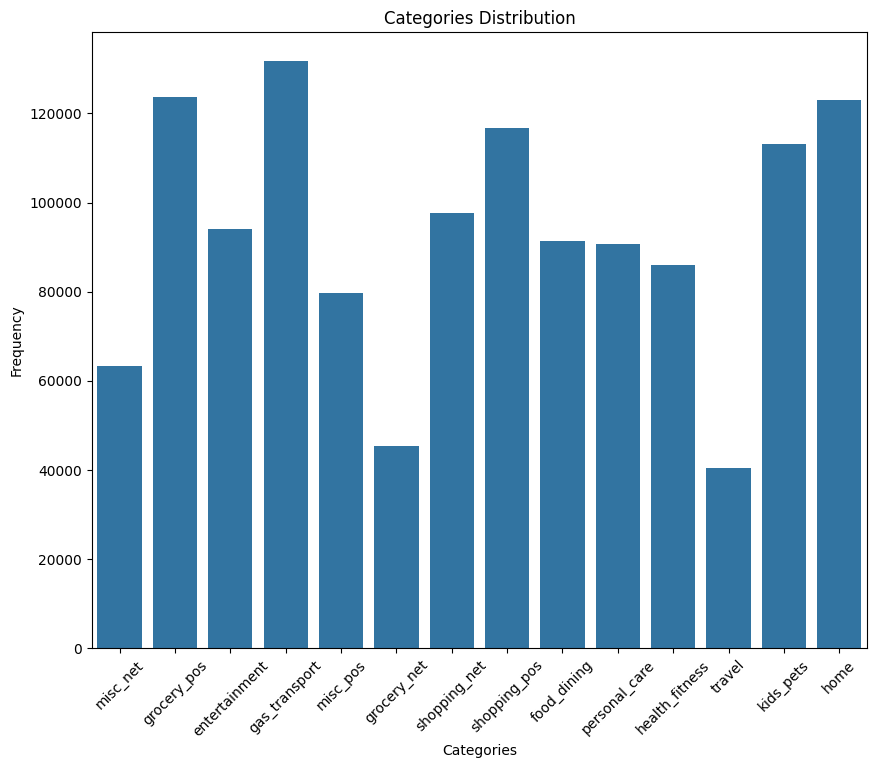

In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv('credit_card_transactions.csv')

#Previous code that dropped columns
df=df.drop(df.columns[[0,2]],axis=1)
df=df.drop('merch_zipcode',axis=1)
df=df.drop('dob',axis=1)
#The inplace=True argument was causing the df to be empty
df=df.drop(['first','last','trans_num'],axis=1)

plt.figure(figsize=[10,8])
sns.countplot(data=df , x='category')
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Categories Distribution')
plt.show()

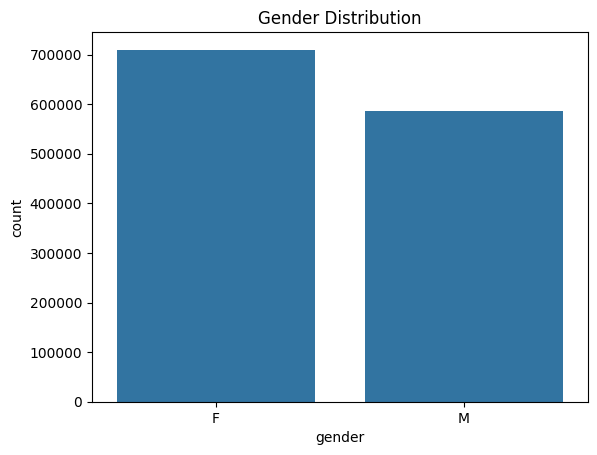

In [ ]:
sns.countplot(data=df , x='gender')
plt.title('Gender Distribution')
plt.show()

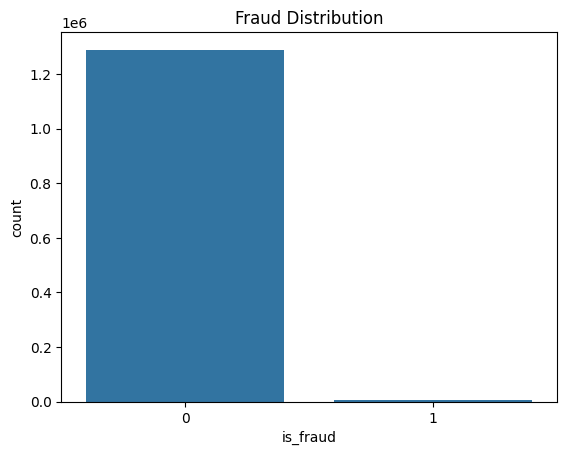

In [ ]:
sns.countplot(data=df , x='is_fraud')
plt.title('Fraud Distribution')
plt.show()

In [ ]:
label=LabelEncoder()
df['merchant']=label.fit_transform(df['merchant'])

In [ ]:
label=LabelEncoder()
df['category']=label.fit_transform(df['category'])

In [ ]:
label=LabelEncoder()
df['job']=label.fit_transform(df['job'])

In [ ]:
label=LabelEncoder()
df['state']=label.fit_transform(df['state'])

In [ ]:
label=LabelEncoder()
df['gender']=label.fit_transform(df['gender'])

In [ ]:
label=LabelEncoder()
df['city']=label.fit_transform(df['city'])

In [ ]:
label=LabelEncoder()
df['street']=label.fit_transform(df['street'])


In [ ]:
df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [ ]:
df=df.drop('trans_date_trans_time',axis=1)
y=df['is_fraud']
x=df.drop('is_fraud',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print(model.score(x_test,y_test))


0.997246807865235


In [ ]:
y_pred=model.predict(x_test)


In [ ]:
df['is_fraud'].value_counts()


,count
is_fraud,
0,1289169
1,7506


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387363
           1       0.63      0.86      0.72      1640

    accuracy                           1.00    389003
   macro avg       0.81      0.93      0.86    389003
weighted avg       1.00      1.00      1.00    389003



In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[386521    842]
 [   229   1411]]


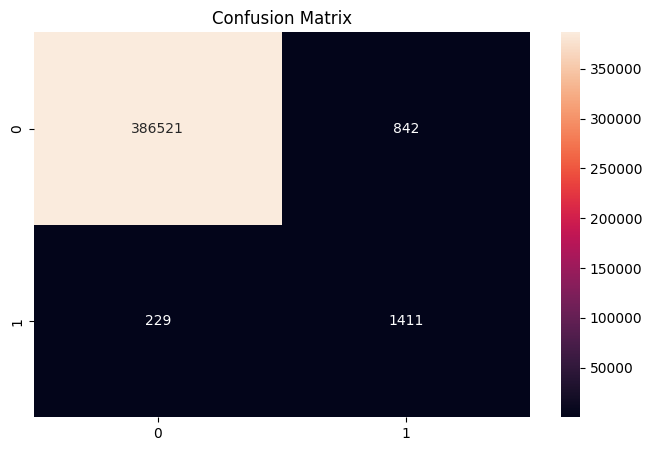

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387363
           1       0.63      0.86      0.72      1640

    accuracy                           1.00    389003
   macro avg       0.81      0.93      0.86    389003
weighted avg       1.00      1.00      1.00    389003

